In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error

In [2]:
data1 = pd.read_csv('D://TCS_stock_action.csv') # Replace with the correct path to your dataset
data2 = pd.read_csv('D://TCS_stock_history.csv')
data3 = pd.read_csv('D://TCS_stock_info.csv')

In [3]:
data1

,Date,Dividends,Stock Splits
0,2004-10-28,0.3750,0.0
1,2005-02-03,0.4375,0.0
2,2005-07-06,0.6250,0.0
3,2005-08-18,0.3750,0.0
4,2005-10-18,0.3750,0.0
...,...,...,...
65,2020-07-16,5.0000,0.0
66,2020-10-14,12.0000,0.0
67,2021-01-14,6.0000,0.0
68,2021-05-25,15.0000,0.0


In [4]:
data2

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0
...,...,...,...,...,...,...,...,...
4458,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754,0.0,0.0
4459,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362,0.0,0.0
4460,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075,0.0,0.0
4461,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,2489161,0.0,0.0


In [9]:
data3

,zip,400001
0,sector,Technology
1,fullTimeEmployees,509058
2,longBusinessSummary,Tata Consultancy Services Limited provides inf...
3,city,Mumbai
4,phone,91 22 6778 9999
...,...,...
145,dividendYield,0.0105
146,bidSize,0
147,dayHigh,3805
148,regularMarketPrice,3773.2


In [11]:
data1['Date'] = pd.to_datetime(data1['Date'])
data1.sort_values(by='Date', inplace=True)
data1.head()

,Date,Dividends,Stock Splits
0,2004-10-28,0.3750,0.0
1,2005-02-03,0.4375,0.0
2,2005-07-06,0.6250,0.0
3,2005-08-18,0.3750,0.0
4,2005-10-18,0.3750,0.0


In [13]:
data2['Date'] = pd.to_datetime(data2['Date'])
data2.sort_values(by='Date', inplace=True)
data2.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [15]:
 # Check for null values
print(data1.isnull().sum())

Date            0
Dividends       0
Stock Splits    0
dtype: int64


In [17]:
print(data2.isnull().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [19]:
print(data3.isnull().sum())

zip        0
400001    42
dtype: int64


In [82]:
# Convert numeric columns if required
data2['Open'] = pd.to_numeric(data2['Open'], errors='coerce')
data2['High'] = pd.to_numeric(data2['High'], errors='coerce')
data2['Low'] = pd.to_numeric(data2['Low'], errors='coerce')
data2['Close'] = pd.to_numeric(data2['Close'], errors='coerce')

In [84]:
# Fill any remaining NaN values
data2.fillna(method='ffill', inplace=True)

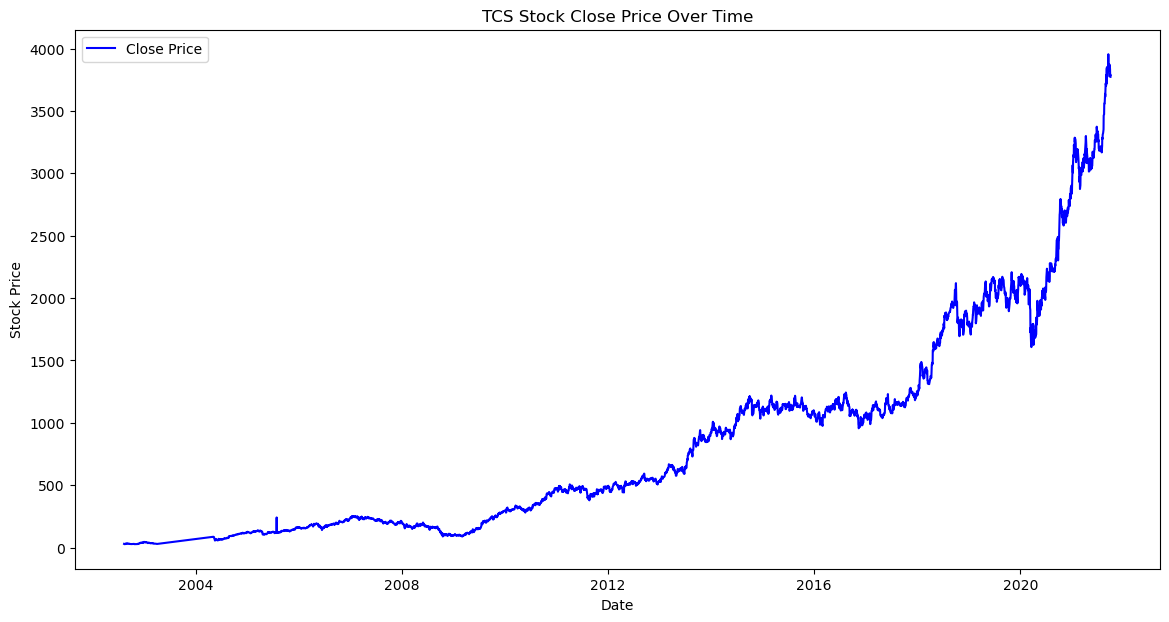

In [86]:
# Plotting Close price over time
plt.figure(figsize=(14, 7))
plt.plot(data2['Date'], data2['Close'], color='blue',
label='Close Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TCS Stock Close Price Over Time')
plt.legend()
plt.show()

In [88]:
 # Calculating 50-day and 200-day moving averages
data2['MA50'] = data2['Close'].rolling(window=50).mean()
data2['MA200'] = data2['Close'].rolling(window=200).mean()

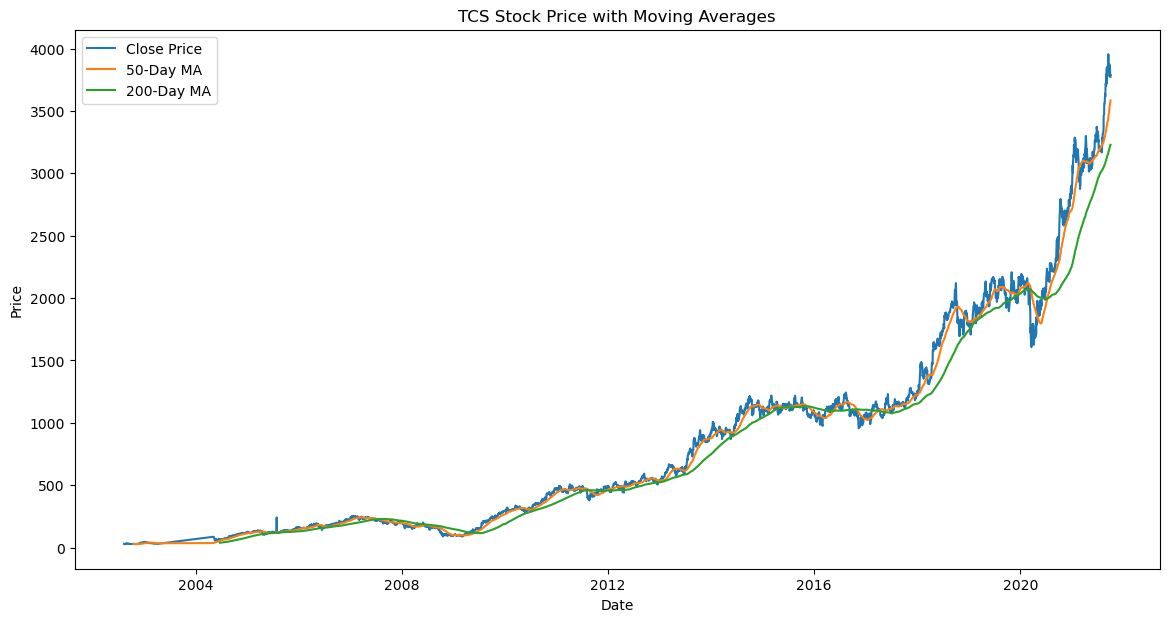

In [90]:
 # Plot with Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(data2['Date'], data2['Close'], label='Close Price')
plt.plot(data2['Date'], data2['MA50'], label='50-Day MA')
plt.plot(data2['Date'], data2['MA200'], label='200-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TCS Stock Price with Moving Averages')
plt.legend()
plt.show()

In [21]:
corel=data2.corr()
corel

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,1.000000,0.899114,0.899354,0.898962,0.899214,-0.177351,0.062321,-0.005701
Open,0.899114,1.000000,0.999888,0.999892,0.999787,-0.153362,0.059743,-0.006715
High,0.899354,0.999888,1.000000,0.999867,0.999914,-0.150918,0.060044,-0.006597
Low,0.898962,0.999892,0.999867,1.000000,0.999901,-0.154962,0.059916,-0.006622
Close,0.899214,0.999787,0.999914,0.999901,1.000000,-0.152844,0.060179,-0.006635
Volume,-0.177351,-0.153362,-0.150918,-0.154962,-0.152844,1.000000,-0.010332,0.004752
Dividends,0.062321,0.059743,0.060044,0.059916,0.060179,-0.010332,1.000000,0.142493
Stock Splits,-0.005701,-0.006715,-0.006597,-0.006622,-0.006635,0.004752,0.142493,1.000000


In [23]:
 # Correlation of features with the target variable (Close Price)
correlation_with_close=data2.corr()['Close'].sort_values(ascending=False)
print(correlation_with_close)


Close           1.000000
High            0.999914
Low             0.999901
Open            0.999787
Date            0.899214
Dividends       0.060179
Stock Splits   -0.006635
Volume         -0.152844
Name: Close, dtype: float64


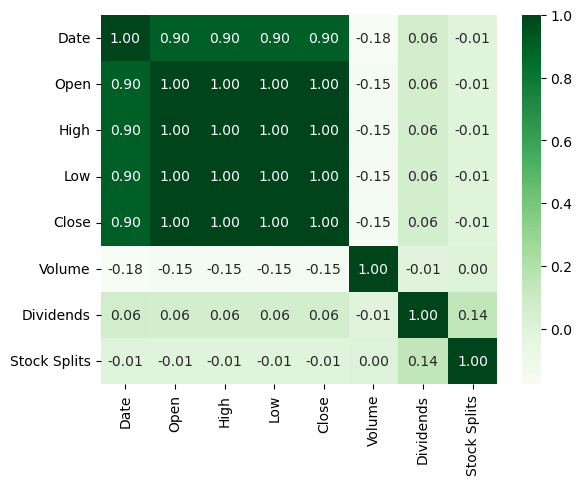

In [25]:
sns.heatmap(corel,annot= True,cmap= "Greens",fmt=".2f")
plt.show()

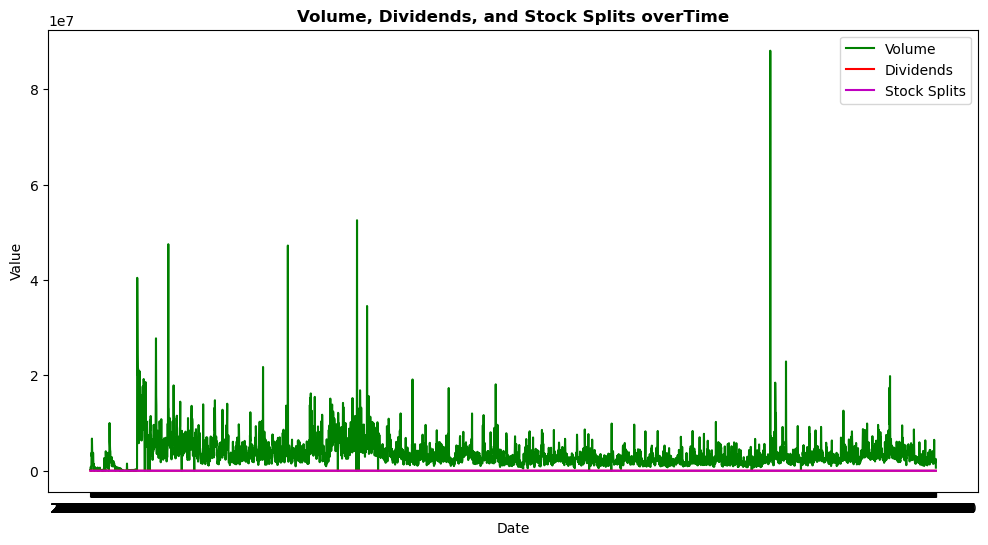

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(data2['Date'], data2['Volume'], label='Volume', color='g')
plt.plot(data2['Date'], data2['Dividends'], label='Dividends',color='r')
plt.plot(data2['Date'], data2['Stock Splits'], label='Stock Splits',color='m')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume, Dividends, and Stock Splits overTime',weight = "bold")
plt.legend()
plt.show()

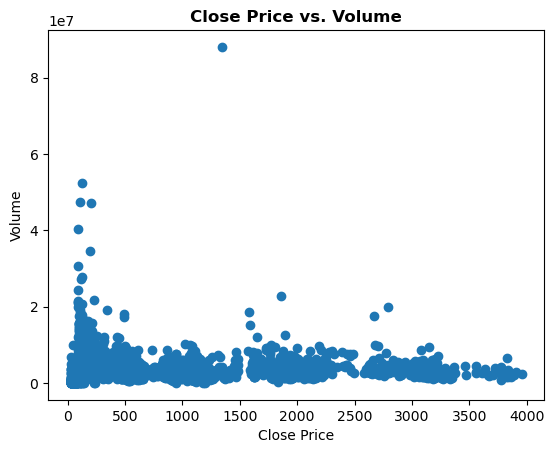

In [13]:
plt.scatter(data2['Close'], data2['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Close Price vs. Volume',weight= "bold")
plt.show()


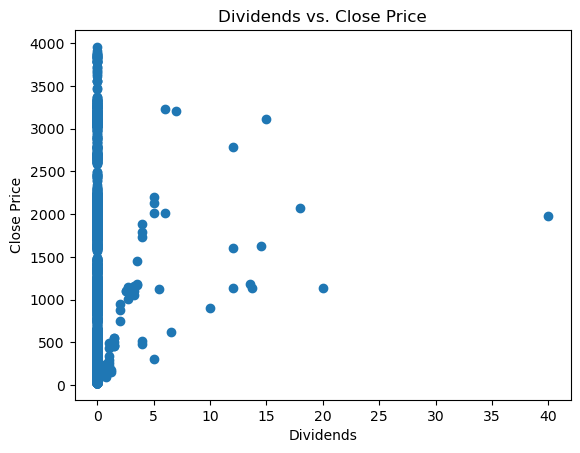

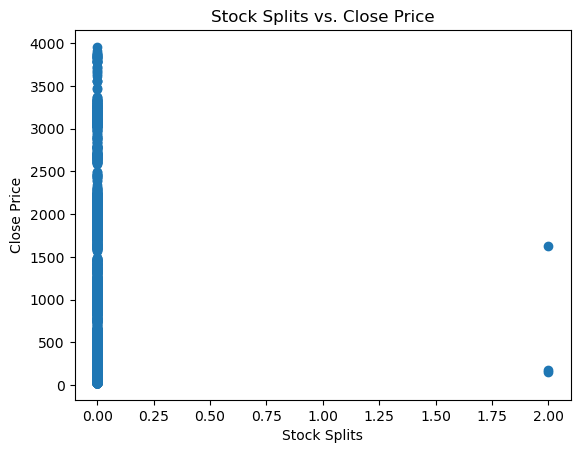

In [15]:
# Dividends vs. Close Price
plt.scatter(data2['Dividends'], data2['Close'])
plt.xlabel('Dividends')
plt.ylabel('Close Price')
plt.title('Dividends vs. Close Price')
plt.show()
# Stock Splits vs. Close Price
plt.scatter(data2['Stock Splits'], data2['Close'])
plt.xlabel('Stock Splits')
plt.ylabel('Close Price')
plt.title('Stock Splits vs. Close Price')
plt.show()


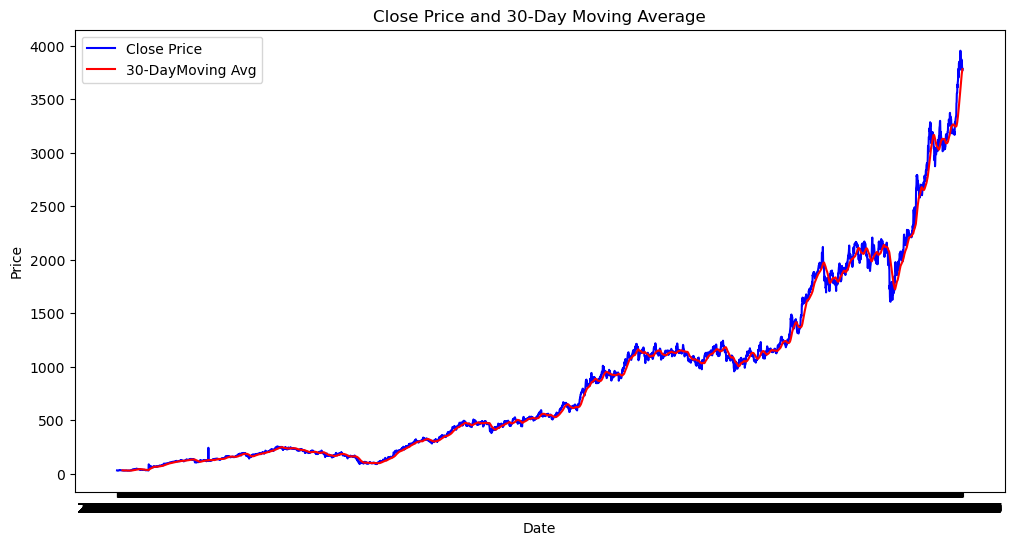

In [17]:
data2['30-Day Moving Avg'] = data2['Close'].rolling(window=30).mean()
 # Plot Close price and moving average
plt.figure(figsize=(12, 6))
plt.plot(data2['Date'], data2['Close'], label='Close Price',color='b')
plt.plot(data2['Date'], data2['30-Day Moving Avg'], label='30-DayMoving Avg', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and 30-Day Moving Average')
plt.legend()
plt.show()

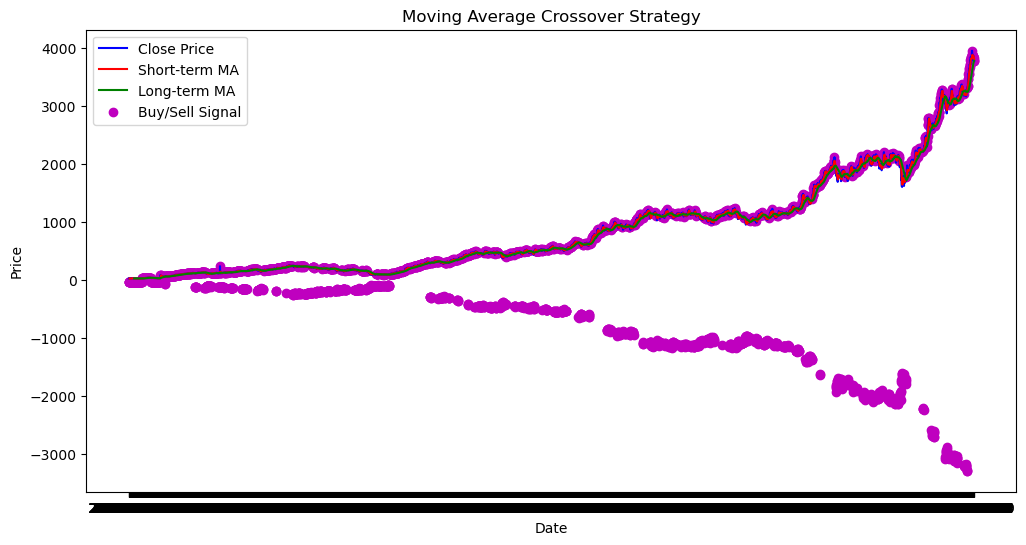

In [23]:
data2['Short_MA'] = data2['Close'].rolling(window=5).mean()
data2['Long_MA'] = data2['Close'].rolling(window=30).mean()
 # Creating a trading signals based on moving average crossovers
data2['Signal'] = np.where(data2['Short_MA'] > data2['Long_MA'], 1,-1)
# Plot the strategy signals
plt.figure(figsize=(12, 6))
plt.plot(data2['Date'], data2['Close'], label='Close Price',color='b')
plt.plot(data2['Date'], data2['Short_MA'], label='Short-term MA',color='r')
plt.plot(data2['Date'], data2['Long_MA'], label='Long-term MA',color='g')
plt.scatter(data2['Date'], data2['Close'] * data2['Signal'],label='Buy/Sell Signal', marker='o', color='m')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()


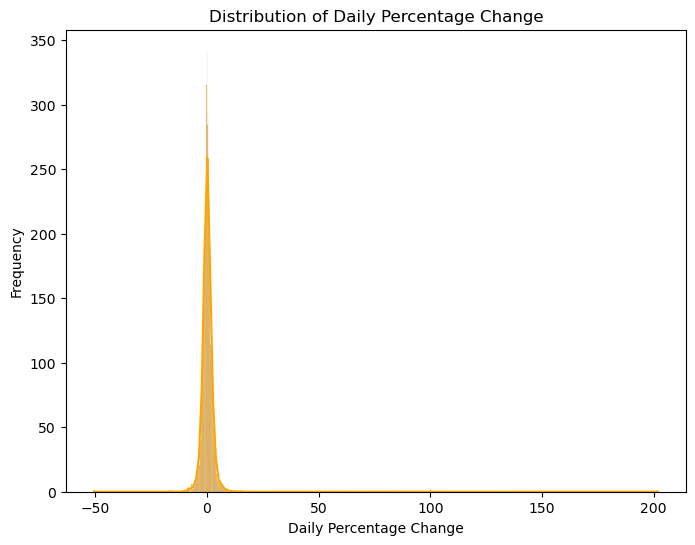

In [25]:
data2['Daily_Price_Change'] = data2['Close'].pct_change() * 100
 # Distribution of daily percentage change
plt.figure(figsize=(8, 6))
sns.histplot(data2['Daily_Price_Change'].dropna(), kde=True,color='orange')
plt.xlabel('Daily Percentage Change')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Percentage Change')
plt.show()


In [94]:
data2['Year'] = data2['Date'].dt.year
data2['Month'] = data2['Date'].dt.month
data2['Day'] = data2['Date'].dt.day
data2['Day_of_Week'] = data2['Date'].dt.dayofweek

In [96]:
 # Lag Features
data2['Prev_Close'] = data2['Close'].shift(1)
data2.dropna(inplace=True) # Drop rows with NaN values from shifting

In [98]:
data2['Moving_Avg_Close'] = data2['Close'].rolling(window=7).mean()

In [189]:
# Prepare the data for LSTM
X_train = data2['Close'].values.reshape(-1, 1)
y_train = data2['Close'].shift(-1).dropna().values

# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define the test data
test_ratio = 0.2
test_size = int(len(data2) * test_ratio)
test_data = data2[-test_size:]

# Prepare the data for prediction
y_test = test_data['Close'].values.reshape(-1, 1)
y_test_scaled = scaler.transform(X_test)
y_test_lstm = X_test_scaled.reshape(-1, 1, 1)

In [106]:
 # Reshape the data for LSTM
 X_train_lstm = X_train_scaled[:-1].reshape(-1, 1, 1)
 y_train_lstm = X_train_scaled[1:]

In [16]:
data2=data2[['Date','Close']]
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4463 non-null   object 
 1   Close   4463 non-null   float64
dtypes: float64(1), object(1)
memory usage: 69.9+ KB


In [20]:
data2 = data2.sort_values('Date',ascending=True)
data2.index = pd.DatetimeIndex(data2["Date"])
data2.drop(["Date"],axis=1,inplace=True)
data2

,Close
Date,
2002-08-12,29.519140
2002-08-13,29.119476
2002-08-14,27.111877
2002-08-15,27.111877
2002-08-16,27.046812
...,...
2021-09-24,3871.300049
2021-09-27,3836.949951
2021-09-28,3779.149902


In [22]:
data2 = data2.asfreq('d')
data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6990 entries, 2002-08-12 to 2021-09-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4463 non-null   float64
dtypes: float64(1)
memory usage: 109.2 KB


In [24]:
data2=data1.fillna(method='ffill')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          70 non-null     object 
 1   Dividends     70 non-null     float64
 2   Stock Splits  70 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.8+ KB
